In [2]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

In [3]:
url = "http://localhost:8000/api/suggestion"

## Test 1

A continuación se muestra una llamada a la API con una fotografía de un tablero sudoku. Se puede observar que se encuentra el tablero y se devuelven sus dígitos.

In [4]:
image_path = "C:/Magister/5to trimestre/DPPD/t2_dppd/static/examples/image202.jpg" 
with open(image_path, "rb") as img_file:
    files = {"file": (image_path, img_file, "image/jpeg")}
    response = requests.post(url, files=files)
pprint(response.json())

{'status': 'ok',
 'sudoku_digitalized': '000060080007000004050803100006000800700010005008000400005609020100000300040070008',
 'suggestion': 'Naked Single: colocar 7 en columna G, fila 7'}


Se muestra el resultado comparando el tablero original con el digitalizado.

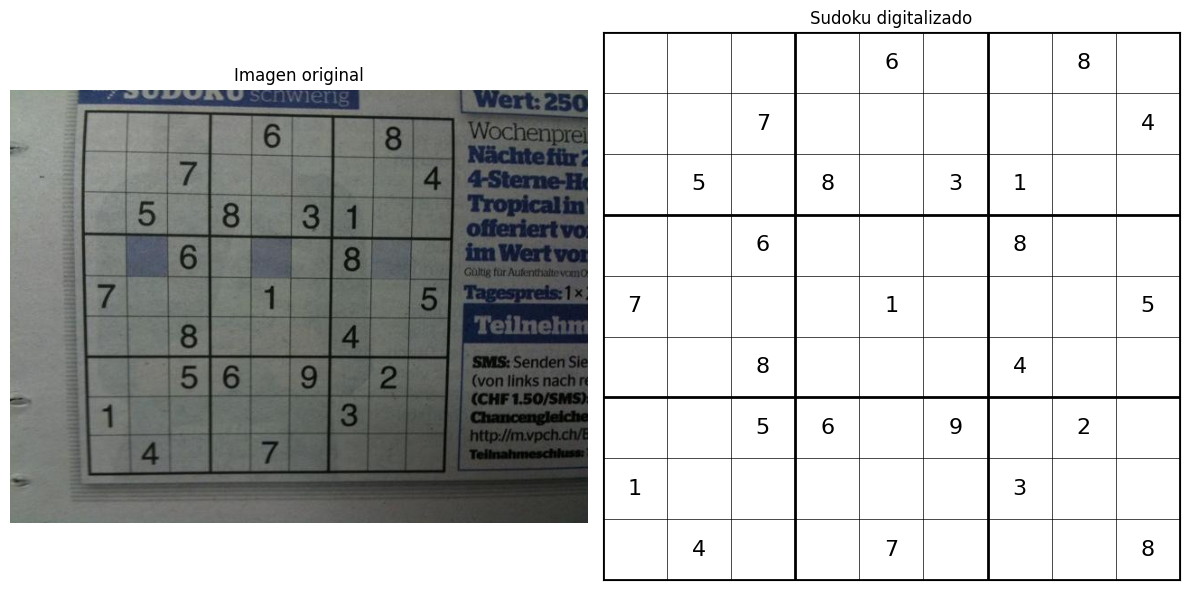

In [5]:
sudoku_digitalized = response.json().get("sudoku_digitalized", "")
prediccion_list = [int(char) for char in sudoku_digitalized]
grid = np.array(prediccion_list).reshape((9, 9))

img = Image.open(image_path)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
ax1.imshow(img)
ax1.set_title("Imagen original")
ax1.axis('off')

# Sudoku digitalizado
ax2.set_facecolor('white')
for i in range(10):
    lw = 2 if i % 3 == 0 else 0.5
    ax2.axhline(i, color='black', lw=lw)
    ax2.axvline(i, color='black', lw=lw)
for i in range(9):
    for j in range(9):
        num = grid[i][j]
        if num != 0:
            ax2.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=16)
ax2.set_xlim(0, 9)
ax2.set_ylim(0, 9)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Sudoku digitalizado")
plt.tight_layout()
plt.show()


## Test 2

A continuación se muestra una llamada a la API con una segunda fotografía de un tablero sudoku. Se puede observar que se encuentra el tablero y se devuelven sus dígitos.

In [6]:
image_path = "C:/Magister/5to trimestre/DPPD/t2_dppd/static/examples/image205.jpg" 
with open(image_path, "rb") as img_file:
    files = {"file": (image_path, img_file, "image/jpeg")}
    response = requests.post(url, files=files)
pprint(response.json())

{'status': 'ok',
 'sudoku_digitalized': '802300000060200504953010000390000001601003080000021000010050800230780906486000052',
 'suggestion': 'Naked Single: colocar 7 en columna C, fila 2'}


Se muestra el resultado comparando el tablero original con el digitalizado.

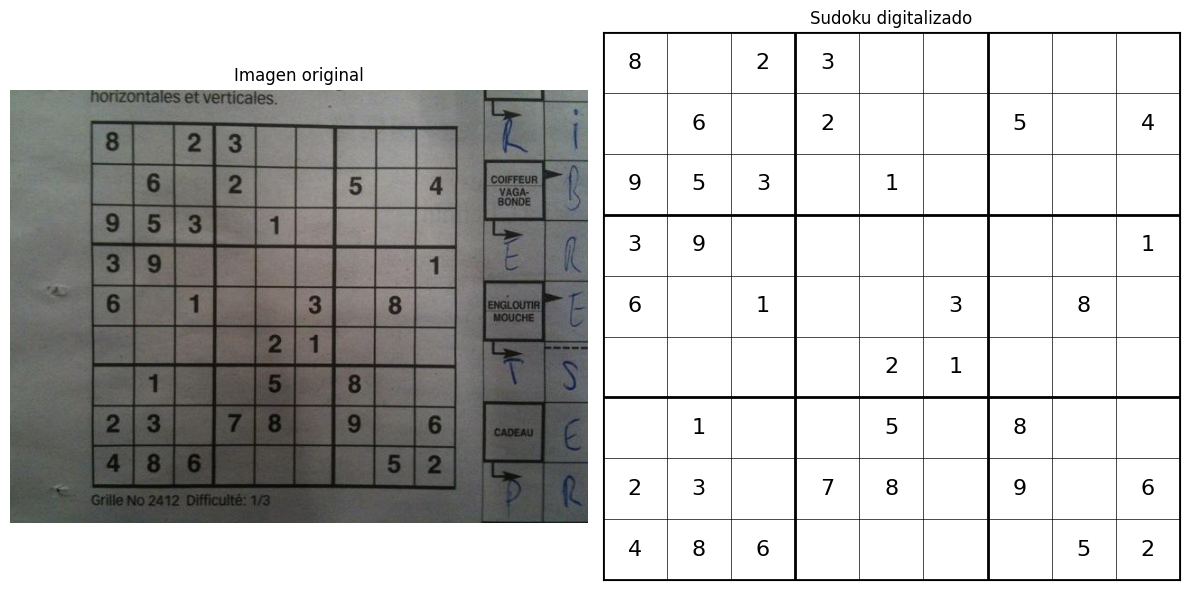

In [7]:
sudoku_digitalized = response.json().get("sudoku_digitalized", "")
prediccion_list = [int(char) for char in sudoku_digitalized]
grid = np.array(prediccion_list).reshape((9, 9))

img = Image.open(image_path)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
ax1.imshow(img)
ax1.set_title("Imagen original")
ax1.axis('off')

# Sudoku digitalizado
ax2.set_facecolor('white')
for i in range(10):
    lw = 2 if i % 3 == 0 else 0.5
    ax2.axhline(i, color='black', lw=lw)
    ax2.axvline(i, color='black', lw=lw)
for i in range(9):
    for j in range(9):
        num = grid[i][j]
        if num != 0:
            ax2.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=16)
ax2.set_xlim(0, 9)
ax2.set_ylim(0, 9)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Sudoku digitalizado")
plt.tight_layout()
plt.show()


## Test 3

A continuación se muestra una llamada a la API con una fotografía de algo que NO es un tablero sudoku. Se puede observar que no se encuentra el tablero y se devuelve un resultado de sólo ceros y con status "no_sudoku_detected".

IMPORTANTE: Esta funcionalidad sólo está disponible de forma local. En la plataforma Render no se determina la existencia del tablero sudoku.

In [8]:
image_path = "C:/Magister/5to trimestre/DPPD/t2_dppd/static/examples/classic_img9.jpg" 
with open(image_path, "rb") as img_file:
    files = {"file": (image_path, img_file, "image/jpeg")}
    response = requests.post(url, files=files)
pprint(response.json())

{'status': 'no_sudoku_detected',
 'sudoku_digitalized': '000000000000000000000000000000000000000000000000000000000000000000000000000000000',
 'suggestion': 'No se detectó ningún tablero de Sudoku en la imagen.'}


Se muestra el resultado comparando el tablero original con el digitalizado.

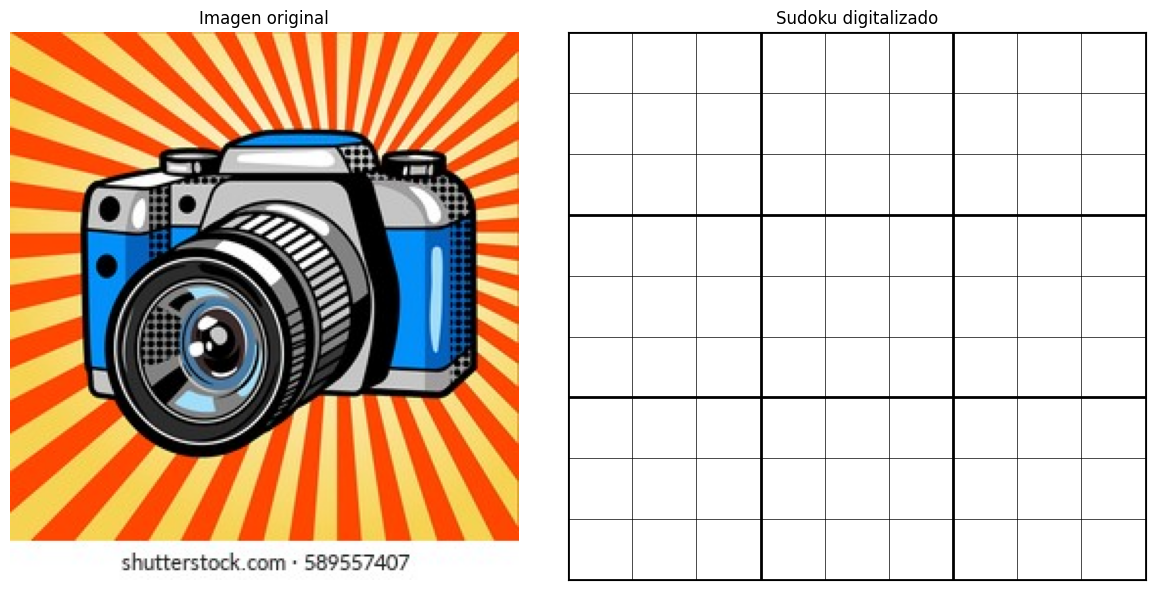

In [9]:
sudoku_digitalized = response.json().get("sudoku_digitalized", "")
prediccion_list = [int(char) for char in sudoku_digitalized]
grid = np.array(prediccion_list).reshape((9, 9))

img = Image.open(image_path)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Imagen original
ax1.imshow(img)
ax1.set_title("Imagen original")
ax1.axis('off')

# Sudoku digitalizado
ax2.set_facecolor('white')
for i in range(10):
    lw = 2 if i % 3 == 0 else 0.5
    ax2.axhline(i, color='black', lw=lw)
    ax2.axvline(i, color='black', lw=lw)
for i in range(9):
    for j in range(9):
        num = grid[i][j]
        if num != 0:
            ax2.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center', fontsize=16)
ax2.set_xlim(0, 9)
ax2.set_ylim(0, 9)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Sudoku digitalizado")
plt.tight_layout()
plt.show()
